<a href="https://colab.research.google.com/github/nitsundon/Load-Forecast/blob/main/ReadDSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!apt-get install tesseract-ocr
!pip install requests pillow pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 30 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (14.9 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 126210 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [102]:
import requests
import cv2
import numpy as np
import pytesseract
from PIL import Image
from io import BytesIO
import re

# **Updated Image URL to link directly to the raw image file**
image_url = "https://mahasldc.in/wp-content/reports/sldc/mvrreport3.jpg"

# Download the image from the URL
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# Convert to OpenCV format
image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Define cropping coordinates (x, y, width, height) - Adjust as needed
x, y, w, h = 1070,1000, 110,24  # Example values, modify as required
x1, y1, w1, h1 = 350,100, 200,60  # Example values, modify as required
# Crop the image
demand_img= image_cv[y:y+h, x:x+w]
time_img= image_cv[y1:y1+h1, x1:x1+w1]

gray_demand = cv2.cvtColor(demand_img, cv2.COLOR_BGR2GRAY)
gray_time = cv2.cvtColor(time_img, cv2.COLOR_BGR2GRAY)


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
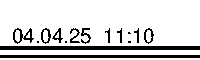

In [103]:
_, binary1 = cv2.threshold(gray_demand, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, binary2 = cv2.threshold(gray_time, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Invert the image (black text on white background)
binary1 = cv2.bitwise_not(binary1)
binary2 = cv2.bitwise_not(binary2)
binary2

In [104]:
# Perform OCR with configuration optimized for numbers
custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist="0123456789 .:"'
demand= pytesseract.image_to_string(binary1, config=custom_config)
time= pytesseract.image_to_string(binary2, config=custom_config)
# Clean the extracted text
demand = demand.strip()
time=time.strip()
demand+"-->"+time

'27223-->04.04.25 11:10'